In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from geopandas import GeoDataFrame
from shapely.wkt import loads
import pyproj

import ml_indicators_EB2 as mli

In [2]:
file_receivers = '../../../../Receiver/RECEIVERSAlpine.csv'
file_predictions = '../../../../Predictions/alpineML3.npy'
file_geometry = '../../../../Predictions/alpineMLgeom3.npy'
file_features_save = '../../../../Predictions/alpineMLfeatures3.npy'
read_EB = True
file_EB = '../../../../Roads/DataCityEB/alpine_streets_drive.csv'
file_model = 'CNN4values2'
file_input_scaler = 'CustomGroupInputScaler.pkl'
file_output_scaler = 'CustomOutputScalerPBF2.pkl'

crs_of_receiver = "EPSG:2062"
point_no = 50

data = np.load(file_predictions)
dataset = data[point_no]

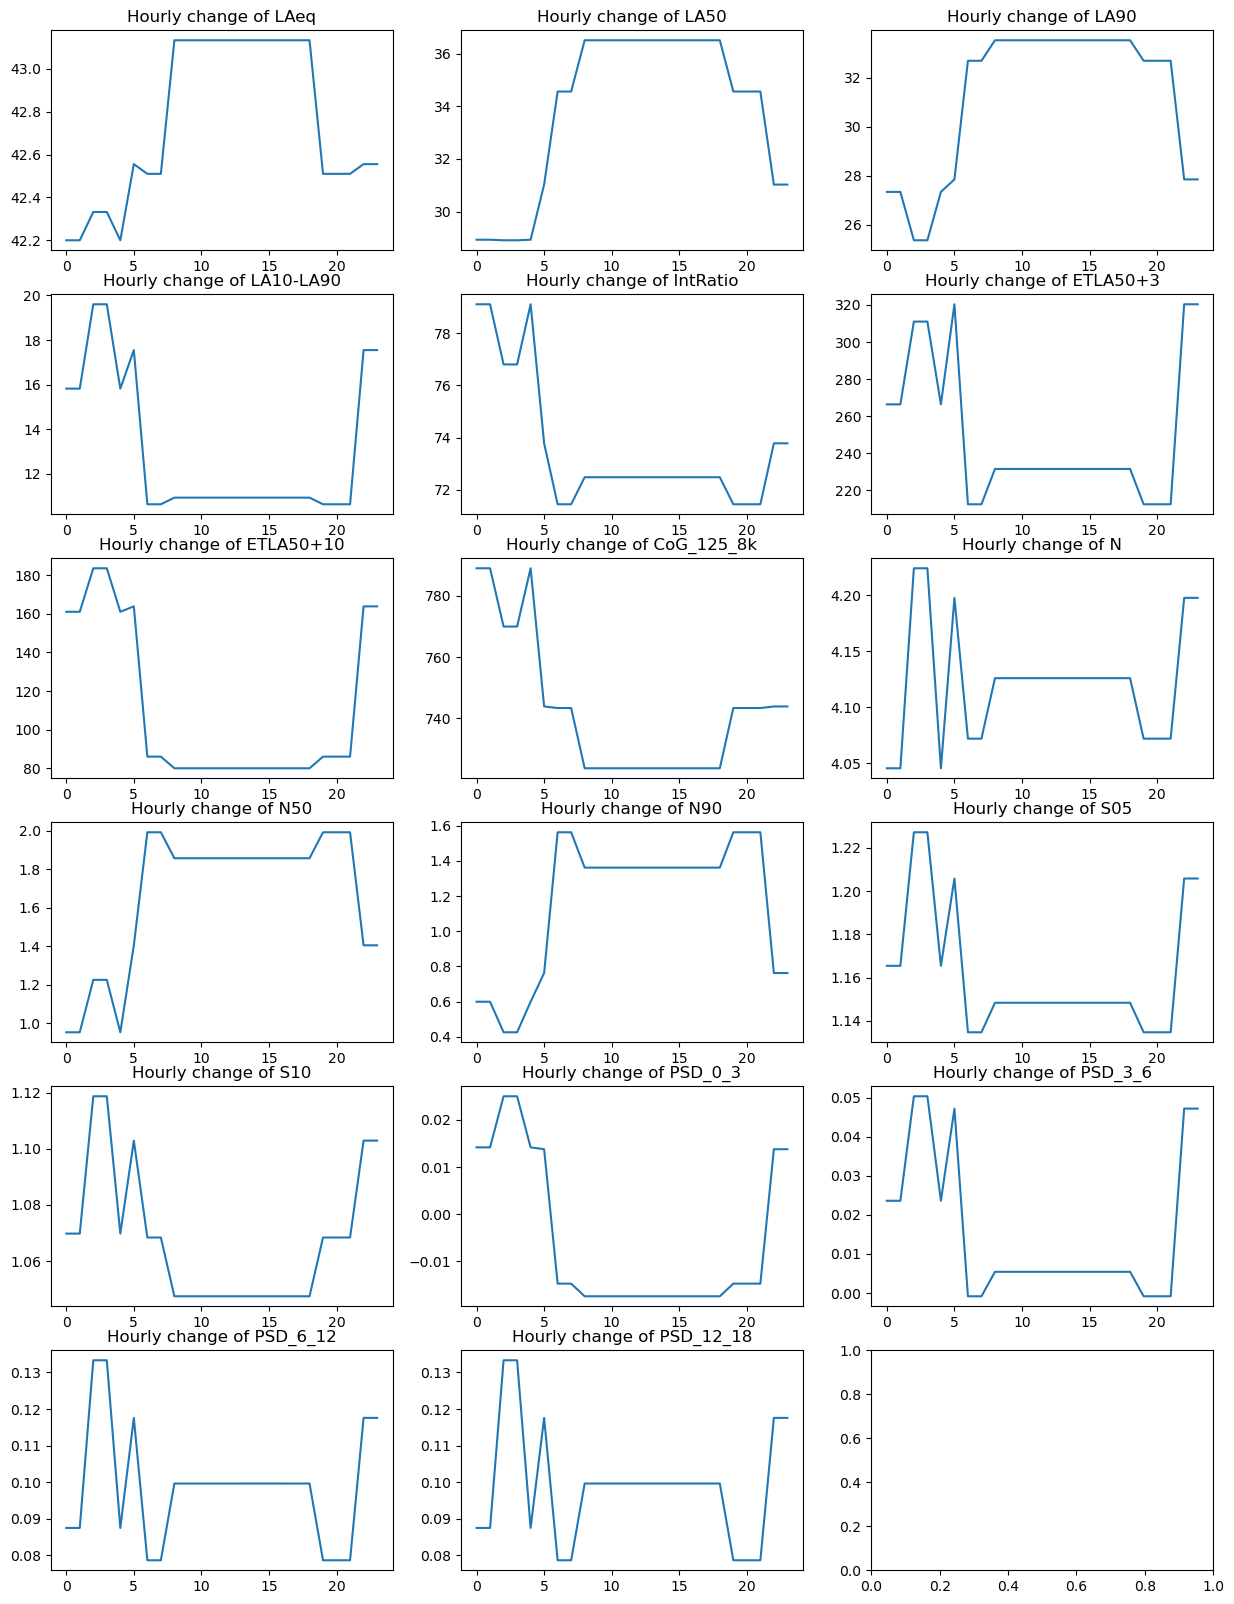

In [3]:
plot_traffic = False

ml_cols = ["LAeq", "LA50", "LA90", "LA10-LA90", "IntRatio", "ETLA50+3", "ETLA50+10", "CoG_125_8k", "N", "N50", "N90", "S05", "S10", "PSD_0_3", "PSD_3_6", "PSD_6_12", "PSD_12_18"]
if plot_traffic:
    
    traffic = []
    max_osm_dist = 200
    srid = crs_of_receiver
    
    file = read_csv(file_receivers)
    file['geometry'] = file['geometry'].apply(loads)
    file = GeoDataFrame(file, geometry='geometry')
    file_geom = file['geometry']
    receiver_point = file_geom[point_no]
    df_roadsEB = read_csv(file_EB)
    df_roadsEB['geometry'] = df_roadsEB['geometry'].apply(loads)
    for i in range(len(df_roadsEB)):
        if str(df_roadsEB['lanes'][i])[0] == '[':
            df_roadsEB['lanes'][i] = min(list(map(int, eval(df_roadsEB['lanes'][i]))))
    df_roadsEB = GeoDataFrame(df_roadsEB, geometry='geometry', crs='EPSG:4326')
    df_roadsEB = df_roadsEB.to_crs("EPSG:%d" % srid)
    polygon = receiver_point.buffer(max_osm_dist)
    df_roads = df_roadsEB.loc[df_roadsEB.intersects(polygon)].reset_index()
    for j in range(len(df_roads)):
        mli.get_traffic_intensity(df_roads, j)
        traffic.append(mli.get_traffic_intensity(df_roads, j))
    traffic = np.array(traffic)
    i = 1
    for street in traffic:
        plt.plot(street)
        plt.title("Day traffic of street " + str(i))
        plt.xlabel("Hour")
        plt.show()
        i += 1

fig, axs = plt.subplots(6, 3, figsize=(15, 20))
for i in range(17):
    change_hour_LAeq = dataset[:, i]
    axs[i//3, i%3].plot(change_hour_LAeq)
    axs[i//3, i%3].set_title("Hourly change of " + ml_cols[i])

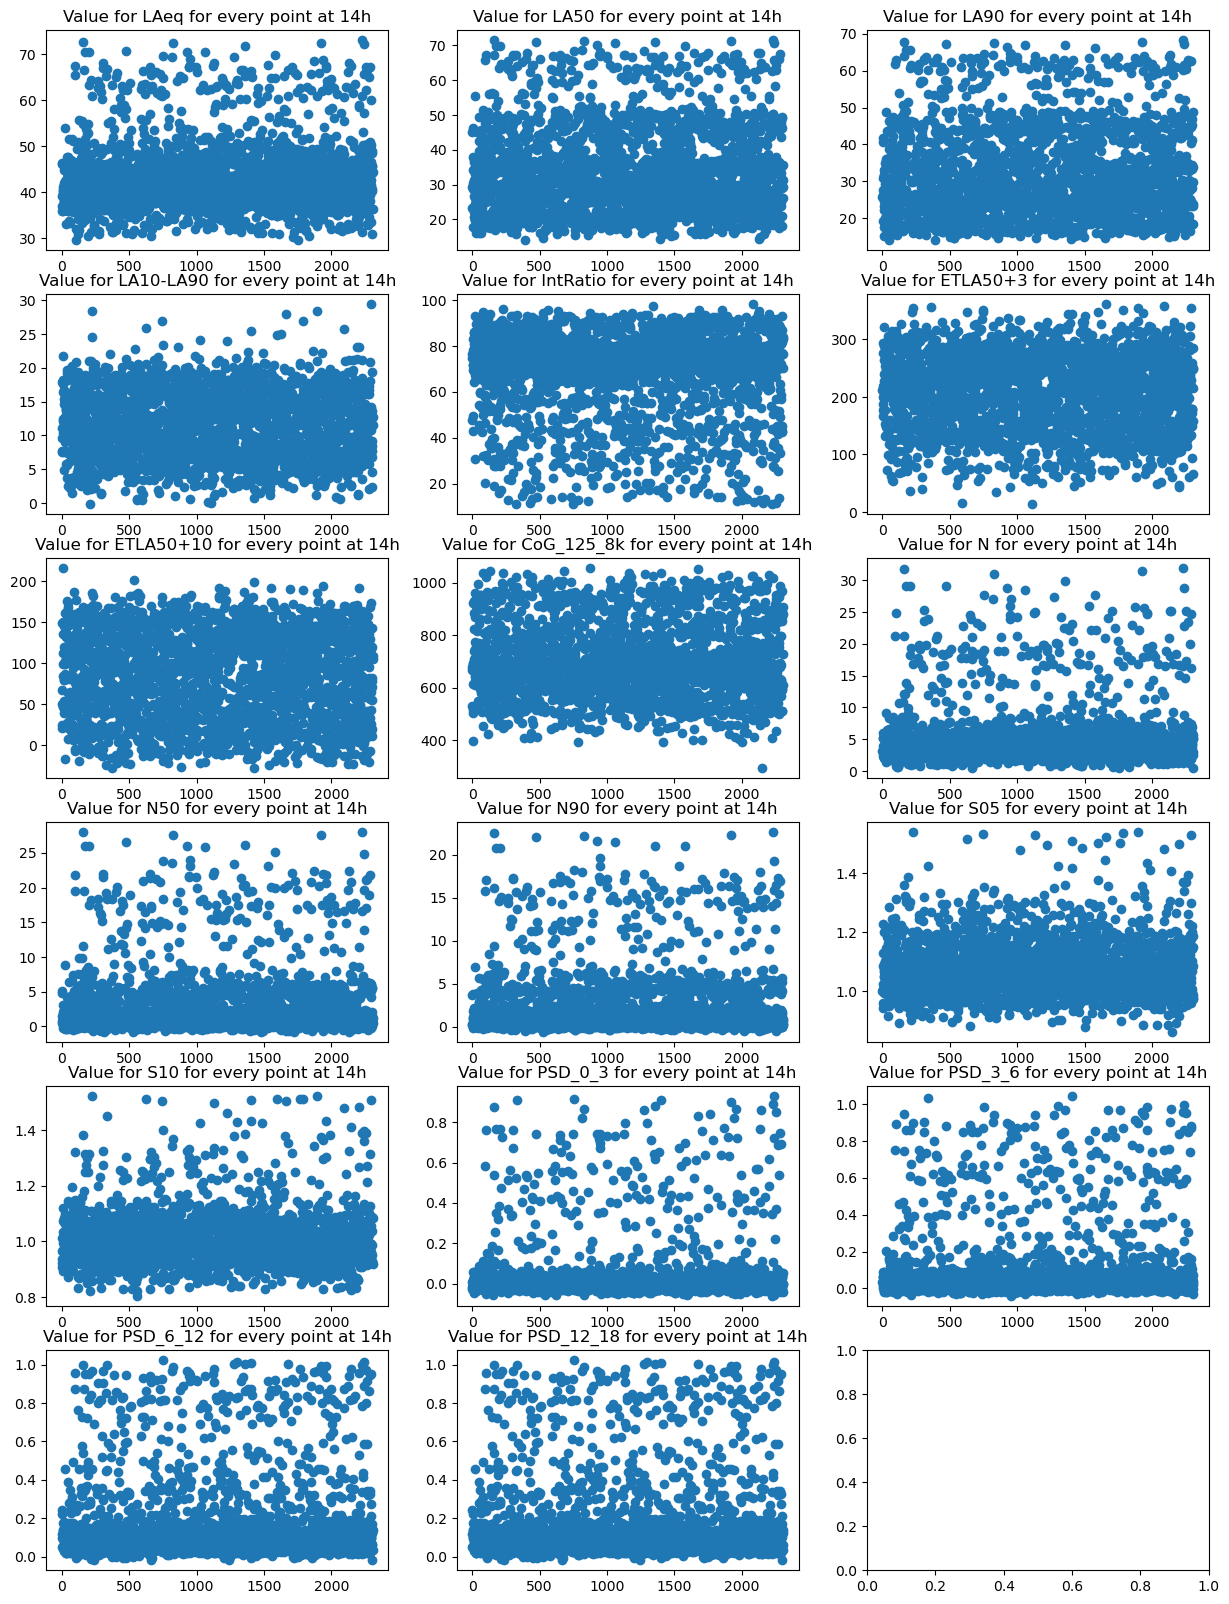

In [4]:
data_t = data[:,14]
x = np.arange(len(data_t))
fig, axs = plt.subplots(6, 3, figsize=(15, 20))
for i in range(17):
    axs[i//3, i%3].scatter(x, data_t[:, i])
    axs[i//3, i%3].set_title("Value for " + ml_cols[i] + " for every point at 14h")

In [6]:
### MAKE .SHP FILE WITH ALL DATA OF POINTS ###
file_save_name = '../../../../Predictions/alpineML3.shp'

geom = np.load(file_geometry, allow_pickle=True)

dictionairy = {ml_cols[j]+"@"+str(i)+"h": data[:, i, j] for j in range(17) for i in range(24)}
dictionairy["geometry"] = geom

gdf = GeoDataFrame(dictionairy, crs=crs_of_receiver)
gdf.to_file(file_save_name)

C:\Users\dbotteld\.conda\envs\ml_model\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\dbotteld\AppData\Local\Temp\9\ipykernel_12752\1262625310.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(file_save_name)


In [18]:
pyproj.datadir.set_data_dir('C:\\Users\\botteldo\\anaconda3\\envs\\ml_model\\Library\\share\\proj')


In [23]:
Mpoints = 0
dwelling_indicators = np.ones((10,5))
dwelling_agg_indicators = np.zeros((10,5))
loc_where = np.where(dwelling_indicators[:,4] == 1)
dwelling_agg_indicators[Mpoints:Mpoints+1,0:4] = np.amax(dwelling_indicators[loc_where[0],0:4],axis=0)

In [24]:
dwelling_agg_indicators

array([[1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [15]:
dwelling_agg_indicators[Mpoints:Mpoints+1,0:4].shape

(1, 4)

In [20]:
loc_where

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)

In [22]:
len(loc_where[0])

10